# Importação das libs

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score

import warnings
import sys

if not sys.warnoptions:
  warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# !pip install dython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Mestrado/2022 - Dissertação/Defesa/dados-pre-processados.csv')

In [ ]:
dados.head()

,num_prontuario,especialidade,horario,genero,data_consulta,compareceu,justificativa,deficiencia,data_nascimento,data_entrada_servico,...,maior60anos,necessita_acompanhante,temp_media_dia,precipitacao_media_dia,temp_max_dia,precipitacao_max_dia,dia_anterior_chuvoso,dia_anterior_chuva_forte,intensidade_chuva,intensidade_calor
0,2123,fisio,13:20,M,09/09/2021,Não,surto,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno
1,2067,psico,13:20,M,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno
2,2012,fono,13:20,F,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno
3,2023,fisio,13:20,F,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno
4,1876,fisio,14:00,M,09/09/2021,Sim,NaN,F,10/10/1954,5/2/2020,...,1,1,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno


In [ ]:
dados.columns

Index(['num_prontuario', 'especialidade', 'horario', 'genero', 'data_consulta',
       'compareceu', 'justificativa', 'deficiencia', 'data_nascimento',
       'data_entrada_servico', 'cidade_procedencia', 'cid', 'ubs',
       'mes_consulta', 'ano_consulta', 'horario_dt', 'turno_consulta',
       'nome_cid', 'idade', 'menor12anos', 'maior60anos',
       'necessita_acompanhante', 'temp_media_dia', 'precipitacao_media_dia',
       'temp_max_dia', 'precipitacao_max_dia', 'dia_anterior_chuvoso',
       'dia_anterior_chuva_forte', 'intensidade_chuva', 'intensidade_calor'],
      dtype='object')

In [ ]:
dados.compareceu.isna().sum()

0

In [ ]:
dados['compareceu'] = dados['compareceu'].replace({'Sim': 1, 'Não': 0})

In [ ]:
dados.columns

Index(['num_prontuario', 'especialidade', 'horario', 'genero', 'data_consulta',
       'compareceu', 'justificativa', 'deficiencia', 'data_nascimento',
       'data_entrada_servico', 'cidade_procedencia', 'cid', 'ubs',
       'mes_consulta', 'ano_consulta', 'horario_dt', 'turno_consulta',
       'nome_cid', 'idade', 'menor12anos', 'maior60anos',
       'necessita_acompanhante', 'temp_media_dia', 'precipitacao_media_dia',
       'temp_max_dia', 'precipitacao_max_dia', 'dia_anterior_chuvoso',
       'dia_anterior_chuva_forte', 'intensidade_chuva', 'intensidade_calor'],
      dtype='object')

In [ ]:
len(dados)

49593

## Anonimização coluna de Código do Prontuário:

In [ ]:
!pip install anonymizedf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.1 MB/s eta 0:00:00


In [ ]:
dados_cp = dados.copy()

In [ ]:
from anonymizedf.anonymizedf import anonymize

anon = anonymize(dados_cp)

In [ ]:
anon.fake_ids("num_prontuario")

,num_prontuario,especialidade,horario,genero,data_consulta,compareceu,justificativa,deficiencia,data_nascimento,data_entrada_servico,...,necessita_acompanhante,temp_media_dia,precipitacao_media_dia,temp_max_dia,precipitacao_max_dia,dia_anterior_chuvoso,dia_anterior_chuva_forte,intensidade_chuva,intensidade_calor,Fake_num_prontuario
0,2123,fisio,13:20,M,09/09/2021,Não,surto,NaN,NaN,NaN,...,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,TZWK15862606574554
1,2067,psico,13:20,M,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,ONFW59376556134577
2,2012,fono,13:20,F,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,QWZZ66301695991601
3,2023,fisio,13:20,F,09/09/2021,Sim,NaN,NaN,NaN,NaN,...,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,INMH28457048250543
4,1876,fisio,14:00,M,09/09/2021,Sim,NaN,F,10/10/1954,5/2/2020,...,1,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,FCBN47480352957452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49588,1848,especialista,10:20,M,01/02/2022,Não,pai tem médico,I,9/3/2009,5/11/2019,...,0,NaN,NaN,NaN,NaN,0,0,sem_chuva_pancadas,muito_frio,FSQP68132745327567
49589,2056,especialista,10:20,M,01/02/2022,Não,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,0,0,sem_chuva_pancadas,muito_frio,SAOW76357056482687
49590,1887,especialista,11:00,M,01/02/2022,Sim,NaN,I,7/3/2016,11/2/2020,...,1,NaN,NaN,NaN,NaN,0,0,sem_chuva_pancadas,muito_frio,RDTU07429084711136
49591,2056,psico,11:00,M,01/02/2022,Não,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,0,0,sem_chuva_pancadas,muito_frio,SAOW76357056482687


In [ ]:
dados_cp[dados_cp['num_prontuario'] == 2123]

,num_prontuario,especialidade,horario,genero,data_consulta,compareceu,justificativa,deficiencia,data_nascimento,data_entrada_servico,...,necessita_acompanhante,temp_media_dia,precipitacao_media_dia,temp_max_dia,precipitacao_max_dia,dia_anterior_chuvoso,dia_anterior_chuva_forte,intensidade_chuva,intensidade_calor,Fake_num_prontuario
0,2123,fisio,13:20,M,09/09/2021,Não,surto,NaN,NaN,NaN,...,0,20.75,0.01,23.7,0.2,1,1,sem_chuva_pancadas,ameno,TZWK15862606574554
15720,2123,fisio,13:20,M,26/08/2021,Sim,NaN,NaN,NaN,NaN,...,0,18.85,0.16,20.8,2.0,1,1,fraca,frio,TZWK15862606574554
27074,2123,fisio,13:20,M,02/09/2021,Não,reação ruim a medicamento,NaN,NaN,NaN,...,0,20.44,0.00,24.4,0.0,1,1,sem_chuva_pancadas,ameno,TZWK15862606574554
40076,2123,fisio,13:20,M,12/08/2021,Sim,NaN,NaN,NaN,NaN,...,0,13.37,0.00,14.7,0.0,1,1,sem_chuva_pancadas,muito_frio,TZWK15862606574554


## Coluna de dia da semana

In [ ]:
dados['data_consulta_dt'] = pd.to_datetime(dados['data_consulta'])

In [ ]:
dados['dia_semana_num'] = dados['data_consulta_dt'].dt.dayofweek

In [ ]:
dados['dia_semana_num'].value_counts()

0    9372
2    8902
4    8722
1    8606
3    7782
5    3137
6    3072
Name: dia_semana_num, dtype: int64

In [ ]:
from datetime import datetime
from datetime import date
import numpy as np

WEEKDAY = {0: 'segunda', 1: 'terça', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sab', 6: 'dom'}

def extrai_appointment_weekday(dia_semana):
    try:
      return WEEKDAY[dia_semana]
    except ValueError as err:
      print('Data com formato inválido: ' + dia_semana)
      pass

dados['dia_semana'] = dados['dia_semana_num'].apply(extrai_appointment_weekday)

In [ ]:
dados.dia_semana.value_counts()

segunda    9372
quarta     8902
sexta      8722
terça      8606
quinta     7782
sab        3137
dom        3072
Name: dia_semana, dtype: int64

In [ ]:
sab_domingo = dados[(dados['dia_semana_num'] == 5) | (dados['dia_semana_num'] == 6)]

## Matriz de correlação

### Matriz de correlação de Pearson (apenas valores numéricos: -1 a 1)

In [ ]:
dados_corr = dados.copy()
dados_corr = dados_corr.drop(['num_prontuario'], axis=1)

cor_df = dados_corr.corr(method = "pearson").round(2)
cor_df

,compareceu,ano_consulta,idade,menor12anos,maior60anos,necessita_acompanhante,temp_media_dia,precipitacao_media_dia,temp_max_dia,precipitacao_max_dia,dia_anterior_chuvoso,dia_anterior_chuva_forte,dia_semana_num
compareceu,1.00,-0.12,0.01,0.03,-0.00,0.03,-0.02,-0.02,-0.00,-0.01,0.03,0.03,-0.00
ano_consulta,-0.12,1.00,-0.18,-0.08,-0.05,-0.11,0.10,0.04,0.02,0.02,-0.30,-0.30,0.03
idade,0.01,-0.18,1.00,-0.29,0.81,0.13,-0.00,-0.00,0.03,0.01,0.09,0.09,-0.00
menor12anos,0.03,-0.08,-0.29,1.00,-0.26,0.87,-0.03,0.02,-0.00,0.02,0.06,0.06,-0.00
maior60anos,-0.00,-0.05,0.81,-0.26,1.00,0.25,0.01,0.00,0.02,0.01,0.04,0.04,-0.01
necessita_acompanhante,0.03,-0.11,0.13,0.87,0.25,1.00,-0.02,0.02,0.01,0.02,0.08,0.08,-0.00
temp_media_dia,-0.02,0.10,-0.00,-0.03,0.01,-0.02,1.00,0.11,0.88,0.20,NaN,NaN,0.04
precipitacao_media_dia,-0.02,0.04,-0.00,0.02,0.00,0.02,0.11,1.00,-0.03,0.84,NaN,NaN,0.04
temp_max_dia,-0.00,0.02,0.03,-0.00,0.02,0.01,0.88,-0.03,1.00,0.11,NaN,NaN,0.02
precipitacao_max_dia,-0.01,0.02,0.01,0.02,0.01,0.02,0.20,0.84,0.11,1.00,NaN,NaN,0.04


Incluir na dissertação a justificativa dos campos que foram descartados.
Mostrar matriz inicial e depois a matriz com os valores removidos.

### Matriz de correlação com todos valores
Pearson para valores **numéricos** e **Cramer V** para valores categóricos

In [ ]:
# from dython.nominal import associations

# dados_corr = dados.copy()
# dados_corr = dados_corr.drop(['num_prontuario', 'horario_dt'], axis=1)

# fig, ax = plt.subplots(figsize=(30, 25))

# sns.set(font_scale=1.5)
# r = associations(dados_corr, ax = ax, cmap = "Blues")

### Matriz de corr com remoção de valores

In [ ]:
# from dython.nominal import associations

# dados_corr = dados.copy()
# dados_corr = dados_corr.drop(['num_prontuario', 'data_consulta', 'data_nascimento', 'data_entrada_servico', 'horario_dt', 'horario',
#                               'temp_media_dia', 'precipitacao_media_dia', 'temp_max_dia', 'precipitacao_max_dia',
#                               'idade', 'nome_cid', 'dia_semana_num', 'dia_semana', 'data_consulta_dt'], axis=1)

# fig, ax = plt.subplots(figsize=(30, 25))

# sns.set(font_scale=1.5)
# r = associations(dados_corr, ax = ax, cmap = "Blues")

## Justificativa para drop de colunas com muitos valores NULOS

In [ ]:
dados.justificativa.value_counts()

doente                               197
sem transporte                       191
gripe                                 78
desmarcado                            78
cancelado atendimento sexta feira     55
                                    ... 
caiu final de semana                   1
desistiu: problemas de locomoção       1
pais com gripe                         1
estava gripado                         1
veio ontem                             1
Name: justificativa, Length: 341, dtype: int64

In [ ]:
total_dados = len(dados)

print("----------------------- CID -----------------------")
print("Dados com a coluna de CID presentes: %d" % (total_dados - (dados.cid.isna().sum())) )
print("Total de dados %d" % total_dados)

print("----------------------- Justificativa -----------------------")
print("Dados com a coluna de Justificativa nulos: %d" % (total_dados - (dados.justificativa.isna().sum())))
print("Total de dados %d" % total_dados)

----------------------- CID -----------------------
Dados com a coluna de CID presentes: 10717
Total de dados 49593
----------------------- Justificativa -----------------------
Dados com a coluna de Justificativa nulos: 1737
Total de dados 49593


## Drop de colunas e ajuste de colunas categóricas

In [ ]:
classes = dados['compareceu']

# Drop columns
## justificativa: muitos poucos valores inseridos (dropar)
## unidade_basica_envio: muitos valores para serem pivotados para colunas (avaliar melhor)
drop_columns = ['num_prontuario', 'compareceu', 'justificativa', 'ubs', 'cid', 'temp_media_dia',
                'precipitacao_media_dia', 'temp_max_dia', 'precipitacao_max_dia', 'nome_cid', 'idade']

                # 'num_prontuario', 'temp_media_dia', 'precipitacao_media_dia', 'temp_max_dia', 'precipitacao_max_dia',
                # 'idade', 'nome_cid'

                # Date columns
                # 'data_consulta', 'data_nascimento', 'data_entrada_servico', 'horario_dt', 'horario'

# Date columns
date_columns = ['data_consulta', 'data_consulta_dt', 'dia_semana_num', 'data_nascimento', 'data_entrada_servico', 'horario_dt', 'horario', 'ano_consulta']

# Apply
attributes = dados.drop(drop_columns + date_columns, axis=1)

# Categorical columns
categorical_columns = ['dia_semana', 'turno_consulta', 'cidade_procedencia', 'genero', 'especialidade', 'deficiencia', 'mes_consulta', 'intensidade_chuva', 'intensidade_calor']

new_attributes = pd.get_dummies(attributes, columns=categorical_columns, drop_first=True)

In [ ]:
new_attributes.columns

Index(['menor12anos', 'maior60anos', 'necessita_acompanhante',
       'dia_anterior_chuvoso', 'dia_anterior_chuva_forte', 'dia_semana_quarta',
       'dia_semana_quinta', 'dia_semana_sab', 'dia_semana_segunda',
       'dia_semana_sexta', 'dia_semana_terça', 'turno_consulta_Tarde',
       'cidade_procedencia_BALN. PIÇARRAS', 'cidade_procedencia_BLUMENAU',
       'cidade_procedencia_BOMBINHAS', 'cidade_procedencia_CAMBORIU',
       'cidade_procedencia_ILHOTA', 'cidade_procedencia_ITAJAÍ',
       'cidade_procedencia_ITAPEMA', 'cidade_procedencia_LUIZ ALVES',
       'cidade_procedencia_MONTENEGRO', 'cidade_procedencia_NAVEGANTES',
       'cidade_procedencia_PENHA', 'cidade_procedencia_PORTO BELO', 'genero_I',
       'genero_M', 'especialidade_enf', 'especialidade_especialista',
       'especialidade_fisio', 'especialidade_fono', 'especialidade_pedagogo',
       'especialidade_psico', 'especialidade_sem especialidade',
       'especialidade_terap_ocupacional', 'deficiencia_F', 'deficiencia_

In [ ]:
len(new_attributes.columns)

54

In [ ]:
for column in new_attributes.columns:
    if new_attributes[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(new_attributes[column].isna().sum() /
                                               new_attributes[column].shape[0]))

In [ ]:
classes.value_counts()

1    44761
0     4832
Name: compareceu, dtype: int64

In [ ]:
(44761/(44761+4832)) * 100

90.25668945214042

## Split em dados de treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_attributes, classes, test_size = 0.20, stratify = classes)
print("Dados de treino com %d elementos e dados de teste com %d elementos" % (len(X_train), len(X_test)))

Dados de treino com 39674 elementos e dados de teste com 9919 elementos


## Balanceamento com SMOTE

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state = 32)
X_smote_res, y_smote_res = smote.fit_resample(new_attributes, classes)

X_train_oversamp, X_test_oversamp, y_train_oversamp, y_test_oversamp = train_test_split(X_smote_res, y_smote_res, test_size = 0.20, stratify = y_smote_res)
print("Dados de treino com %d elementos e dados de teste com %d elementos" % (len(X_train_oversamp), len(X_test_oversamp)))

Dados de treino com 71617 elementos e dados de teste com 17905 elementos


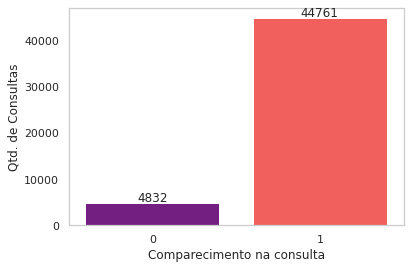

In [ ]:
sns.set(font_scale=1)
sns.set_style("whitegrid", {'axes.grid' : False})

chart = sns.countplot(x = dados.compareceu, palette="magma", saturation = 8)
chart.set(xlabel='Comparecimento na consulta', ylabel='Qtd. de Consultas')

for p in chart.patches:
  chart.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.,
                                                 p.get_height()), ha = 'center',
                                                 va = 'center', xytext = (0, 5),
                                                 textcoords = 'offset points')

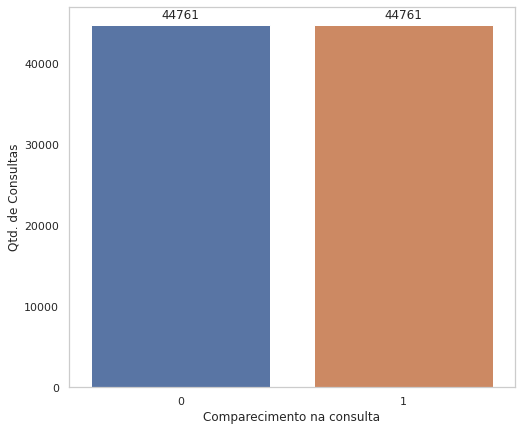

In [ ]:
plt.figure(figsize=(8,7))

chart = sns.countplot(x=y_smote_res)
chart.set(xlabel='Comparecimento na consulta', ylabel='Qtd. de Consultas')

for p in chart.patches:
    chart.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.,
                                                 p.get_height()), ha = 'center',
                                                 va = 'center', xytext = (0, 10),
                                                 textcoords = 'offset points')

# Algoritmos

## Funções de apoio

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def print_results(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()

  print("Acurácia média com cross validation: %.2f" % (media * 100))
  # Com base na estatística: 95% da densidade está dentro da média mais ou menos 2 desvios padrões
  print("Intervalo de acurácia com cross validation: [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao)*100))

In [ ]:
def acuracy(alg, alg_name, X_test, y_test):
    acuracia = alg.score(X_test, y_test) * 100
    print("Acurácia do %s: %.2f%%" % (alg_name, acuracia))

In [ ]:
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold

def cross_validation(alg, attributes, classes):
    cv = StratifiedKFold(n_splits = 10, shuffle=True)
    results = cross_validate(alg, attributes, classes, cv = cv)
    print_results(results)

In [ ]:
def conf_matrix_report(alg, alg_name, X_test, y_test):
    y_pred = alg.predict(X_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, normalize='true')

    sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
    plt.ylabel('Classe')
    plt.xlabel('Classe Predita')
    plt.title(alg_name)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

def conf_matrix_report2(alg, alg_name, X_test, y_test, normalize=None, cmap='Blues'):
    y_pred = alg.predict(X_test)
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(estimator=alg, X=X_test, y_true=y_test,
                      normalize=normalize, cmap=cmap)

    # cm = confusion_matrix(y_test, y_pred, normalize='true')

    # sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')
    plt.ylabel('Classe')
    plt.xlabel('Classe Predita')
    plt.title(alg_name)

# Dummy Classifier

Acurácia do dummy_classifier: 90.26%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       966
           1       0.90      1.00      0.95      8953

    accuracy                           0.90      9919
   macro avg       0.45      0.50      0.47      9919
weighted avg       0.81      0.90      0.86      9919



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


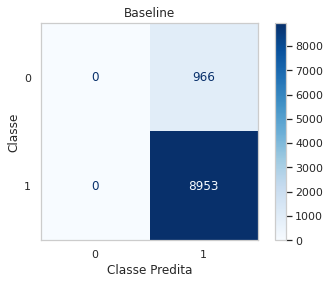

In [ ]:
SEED = 5
np.random.seed(SEED)

from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)

acuracy(dummy_classifier, 'dummy_classifier', X_test, y_test)
conf_matrix_report2(dummy_classifier, 'Baseline', X_test, y_test)

Acurácia do dummy_classifier: 50.00%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      8952
           1       0.00      0.00      0.00      8953

    accuracy                           0.50     17905
   macro avg       0.25      0.50      0.33     17905
weighted avg       0.25      0.50      0.33     17905



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


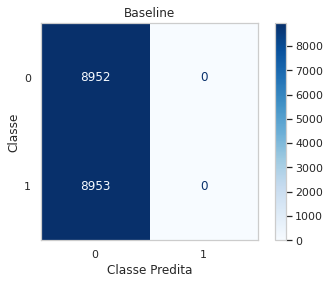

In [ ]:
SEED = 5
np.random.seed(SEED)

from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(dummy_classifier, 'dummy_classifier',  X_test_oversamp, y_test_oversamp)
conf_matrix_report2(dummy_classifier, 'Baseline', X_test_oversamp, y_test_oversamp)

# Decision Tree

### Dados Desbalanceados

In [ ]:
# SEED = 5
# np.random.seed(SEED)

# from sklearn.tree import DecisionTreeClassifier

# classifier_decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=10)
# classifier_decision_tree.fit(X_train, y_train)

# acuracy(classifier_decision_tree, 'Árvore de Decisão', X_test, y_test)
# cross_validation(classifier_decision_tree, new_attributes, classes)
# conf_matrix_report2(classifier_decision_tree, 'Árvore de Decisão', X_test, y_test)

### Dados Balanceados

Acurácia do Árvore de Decisão: 67.65%
Acurácia média com cross validation: 67.22
Intervalo de acurácia com cross validation: [66.14, 68.30]
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      8952
           1       0.73      0.56      0.64      8953

    accuracy                           0.68     17905
   macro avg       0.69      0.68      0.67     17905
weighted avg       0.69      0.68      0.67     17905



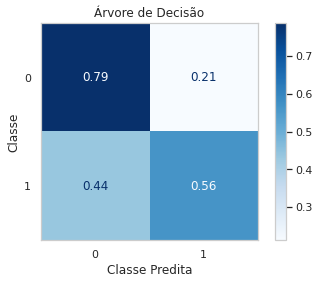

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_decision_tree_balanc = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
classifier_decision_tree_balanc.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_decision_tree_balanc, 'Árvore de Decisão', X_test_oversamp, y_test_oversamp)
cross_validation(classifier_decision_tree_balanc, X_smote_res, y_smote_res)
conf_matrix_report2(classifier_decision_tree_balanc, 'Árvore de Decisão', X_test_oversamp, y_test_oversamp, 'true')

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      8952
           1       0.73      0.56      0.64      8953

    accuracy                           0.68     17905
   macro avg       0.69      0.68      0.67     17905
weighted avg       0.69      0.68      0.67     17905



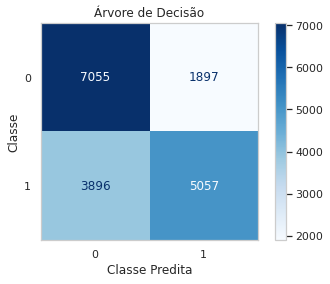

In [ ]:
conf_matrix_report2(classifier_decision_tree_balanc, 'Árvore de Decisão', X_test_oversamp, y_test_oversamp)

In [ ]:
precisao = 5010 / (5010 + 1602)
round(precisao, 2)

0.76

In [ ]:
especificidade = 7055 / (7055+1897)
round(especificidade, 2)

0.79

In [ ]:
sensibilidade_recall = 5010 / (5010+3942)
round(sensibilidade_recall, 2)

0.56

# Logistic Regression


### Dados Balanceados

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do Regressão Logística - Balanceada: 75.54%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Acurácia média com cross validation: 75.52
Intervalo de acurácia com cross validation: [74.57, 76.47]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      8952
           1       0.75      0.76      0.76      8953

    accuracy                           0.76     17905
   macro avg       0.76      0.76      0.76     17905
weighted avg       0.76      0.76      0.76     17905



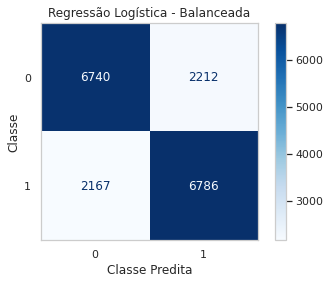

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_logit_balanc = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42) # valores default (explícitos só pra facilitar o documento)
classifier_logit_balanc.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_logit_balanc, 'Regressão Logística - Balanceada', X_test_oversamp, y_test_oversamp)
cross_validation(classifier_logit_balanc, X_smote_res, y_smote_res)
conf_matrix_report2(classifier_logit_balanc, 'Regressão Logística - Balanceada', X_test_oversamp, y_test_oversamp)

# Random Forest

### Dados Balanceados

Acurácia do Random Forest - Balanceada: 88.04%
Acurácia média com cross validation: 88.77
Intervalo de acurácia com cross validation: [88.42, 89.13]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      8953
           1       0.91      0.85      0.88      8952

    accuracy                           0.88     17905
   macro avg       0.88      0.88      0.88     17905
weighted avg       0.88      0.88      0.88     17905



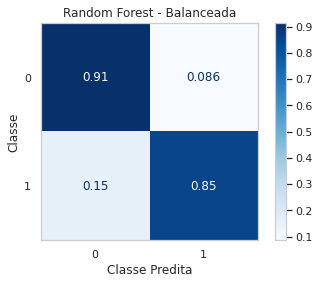

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_random_forest_balanc = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_random_forest_balanc.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_random_forest_balanc, 'Random Forest - Balanceada', X_test_oversamp, y_test_oversamp)
cross_validation(classifier_random_forest_balanc, X_smote_res, y_smote_res)
conf_matrix_report2(classifier_random_forest_balanc, 'Random Forest - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

In [ ]:
classifier_random_forest_balanc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Support Vector Classifier (SVC) - DEMORADO

## Testar **Linear Support Vector Classification.**
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

### Dados Balanceados

In [ ]:
# from sklearn.svm import SVC

# svc_classifier_balanc = SVC(kernel='linear', class_weight='balanced', random_state=42)
# svc_classifier_balanc = svc_classifier_balanc.fit(X_train_oversamp, y_train_oversamp)

# acuracy(svc_classifier_balanc, 'Support Vector Classifier (SVC)', X_test_oversamp, y_test_oversamp)
# # cross_validation(svc_classifier_balanc, X_smote_res, y_smote_res)
# conf_matrix_report2(svc_classifier_balanc, 'Support Vector Classifier (SVC)', X_test_oversamp, y_test_oversamp, 'true')

# AdaBoost Classifier (Decision Tree - default)

Usa o algoritmo DecisionTreeClassifier como classificador fraco default (weak learner).

### Dados Balanceados

Acurácia do AdaBoost (DT) - Balanceada: 71.33%
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      8952
           1       0.72      0.69      0.71      8953

    accuracy                           0.71     17905
   macro avg       0.71      0.71      0.71     17905
weighted avg       0.71      0.71      0.71     17905



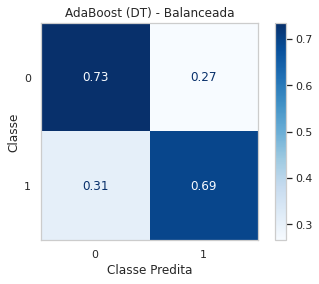

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier_balanc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adaboost_classifier_balanc = adaboost_classifier_balanc.fit(X_train_oversamp, y_train_oversamp)

acuracy(adaboost_classifier_balanc, 'AdaBoost (DT) - Balanceada', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(adaboost_classifier_balanc, 'AdaBoost (DT) - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# AdaBoost Classifier (SVC)

Usa o algoritmo SVC como classificador fraco.

In [ ]:
# SEED = 5
# np.random.seed(SEED)

# from sklearn.svm import SVC

# svc = SVC(probability=True, kernel='linear')

# adaboost_classifier_svc_balanc = AdaBoostClassifier(n_estimators=10, base_estimator=svc, learning_rate=1)
# adaboost_classifier_svc_balanc = adaboost_classifier_svc_balanc.fit(X_train_oversamp, y_train_oversamp)

# acuracy(adaboost_classifier_svc_balanc, 'AdaBoost (SVC) - Balanceada', X_test_oversamp, y_test_oversamp)
# conf_matrix_report(adaboost_classifier_svc_balanc, 'AdaBoost (SVC) - Balanceada', X_test_oversamp, y_test_oversamp)

# XGBoost

XGBoost, which is short for “Extreme Gradient Boosting,” is a library that provides an efficient implementation of the gradient boosting algorithm.

Acurácia do XGBoost - Balanceada: 72.56%
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8952
           1       0.75      0.68      0.71      8953

    accuracy                           0.73     17905
   macro avg       0.73      0.73      0.72     17905
weighted avg       0.73      0.73      0.72     17905



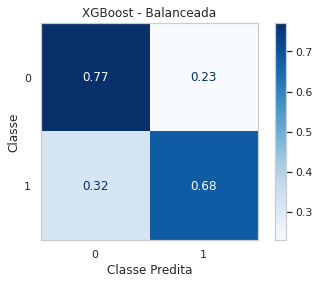

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_classifier = xgb_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(xgb_classifier, 'XGBoost - Balanceada', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(xgb_classifier, 'XGBoost - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# Gradient Boosting

Acurácia do Gradient Boosting - Balanceada: 73.24%
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      8952
           1       0.80      0.62      0.70      8953

    accuracy                           0.73     17905
   macro avg       0.75      0.73      0.73     17905
weighted avg       0.75      0.73      0.73     17905



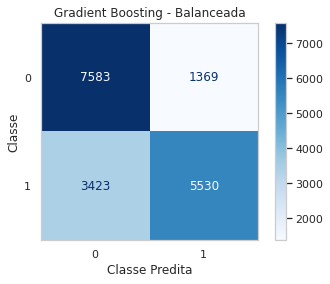

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboosting_classifier_balanc = GradientBoostingClassifier(init=classifier_decision_tree_balanc, random_state=42) # Valor default
gboosting_classifier_balanc = gboosting_classifier_balanc.fit(X_train_oversamp, y_train_oversamp)

acuracy(gboosting_classifier_balanc, 'Gradient Boosting - Balanceada', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(gboosting_classifier_balanc, 'Gradient Boosting - Balanceada', X_test_oversamp, y_test_oversamp)

# Gradient Boosting (Histogram-Based)

This is an alternate approach to implement gradient tree boosting inspired by the LightGBM. The primary benefit of the histogram-based approach to gradient boosting is speed. These implementations are designed to be much faster to fit on training data.

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier

# hist_gboosting_classifier_balanc = HistGradientBoostingClassifier()
# hist_gboosting_classifier_balanc = hist_gboosting_classifier_balanc.fit(X_train_oversamp, y_train_oversamp)

# acuracy(hist_gboosting_classifier_balanc, 'Hist Gradient Boosting - Balanceada', X_test_oversamp, y_test_oversamp)
# conf_matrix_report2(hist_gboosting_classifier_balanc, 'Hist Gradient Boosting - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# LightGBM

LightGBM, short for Light Gradient Boosted Machine, is a library developed at Microsoft that provides an efficient implementation of the gradient boosting algorithm. Ref: https://papers.nips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf

The primary benefit of the LightGBM is the changes to the training algorithm that make the process dramatically faster, and in many cases, result in a more effective model.

Acurácia do Light GBM - Balanceada: 80.03%
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8952
           1       0.80      0.80      0.80      8953

    accuracy                           0.80     17905
   macro avg       0.80      0.80      0.80     17905
weighted avg       0.80      0.80      0.80     17905



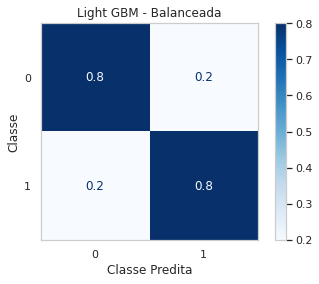

In [ ]:
from lightgbm import LGBMClassifier

light_gbm_classifier = LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42) # traditional Gradient Boosting Decision Tree (gbdt)
light_gbm_classifier = light_gbm_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(light_gbm_classifier, 'Light GBM - Balanceada', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(light_gbm_classifier, 'Light GBM - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# Stacking

## XGBoost, Random Forest + Logistic Regression (Melhor performance até agora - precision e recall)

Acurácia do Stacking - Balanceada: 88.59%
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8952
           1       0.89      0.88      0.88      8953

    accuracy                           0.89     17905
   macro avg       0.89      0.89      0.89     17905
weighted avg       0.89      0.89      0.89     17905



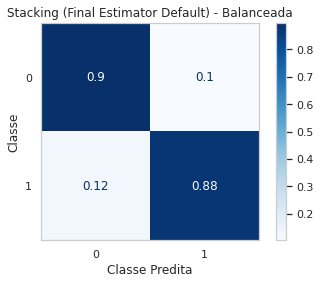

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', classifier_random_forest_balanc),
     ('xgb', xgb_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators, cv=5) # final_estimator default = LogisticRegression
stacking_classifier = stacking_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(stacking_classifier, 'Stacking - Balanceada', X_test_oversamp, y_test_oversamp)
# cross_validation(stacking_classifier, X_smote_res, y_smote_res)
conf_matrix_report2(stacking_classifier, 'Stacking (Final Estimator Default) - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

## XGBoost, Random Forest + Gradient Boosting

Acurácia do Stacking - Balanceada: 88.03%
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8952
           1       0.89      0.87      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.88      0.88      0.88     17905
weighted avg       0.88      0.88      0.88     17905



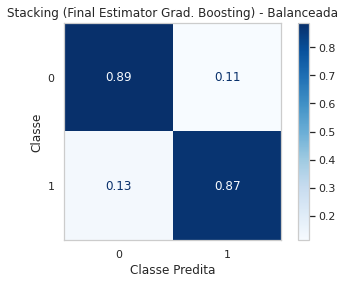

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
     ('rf', classifier_random_forest_balanc),
     ('xgb', xgb_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators,
                            final_estimator=gboosting_classifier_balanc,
                            cv=5)
stacking_classifier = stacking_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(stacking_classifier, 'Stacking - Balanceada', X_test_oversamp, y_test_oversamp)
# cross_validation(stacking_classifier, X_smote_res, y_smote_res)
conf_matrix_report2(stacking_classifier, 'Stacking (Final Estimator Grad. Boosting) - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# Tunning Hiperparâmetros

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

# Decision Tree
dt_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ["gini", "entropy"]
}

# Random Forest
rf_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

from scipy.stats import loguniform

solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_options = loguniform(1e-5, 100)
multiclass = ['auto', 'ovr']

# Logistic Regression
lr_grid = {
    'solver': solver,
    'penalty': penalty,
    'C': c_options,
    'multi_class': multiclass
}

# Adaboost
ada_grid = {
    'n_estimators': [10, 11, 12, 20, 50, 100],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

# learn_rates = [0.02, 0.05]
learn_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]

# Gradient Boosting
gboost_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learn_rates,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split
}

# LightGBM
lightgbm_grid = {
    'boosting_type': ['rf', 'gbdt', 'dart'],
    'learning_rate': learn_rates,
    'class_weight': ['balanced', None]
}

In [ ]:
np.random.uniform(0, 1)

0.2629749318334792

## Decision Tree

In [ ]:
dt_random = RandomizedSearchCV(estimator = classifier_decision_tree_balanc,
              param_distributions = dt_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
dt_random.fit(X_train_oversamp, y_train_oversamp)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10]},
                   random_state=42)

In [ ]:
print ('Parâmetros iniciais: ', classifier_decision_tree_balanc.get_params(), '\n')
print ('Best Parameters: ', dt_random.best_params_, ' \n')
print ('Best Estimator: ', dt_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'} 

Best Parameters:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'criterion': 'gini'}  

Best Estimator:  DecisionTreeClassifier(max_depth=110, max_features='auto', random_state=42)  



### Treino e score com novos best params



Acurácia do Árvore de Decisão - Params Iniciais: 67.65%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Acurácia do Árvore de Decisão - Tunning HP: 86.13%
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      8952
           1       0.91      0.80      0.85      8953

    accuracy                           0.86     17905
   macro avg       0.87      0.86      0.86     17905
weighted avg       0.87      0.86      0.86     17905



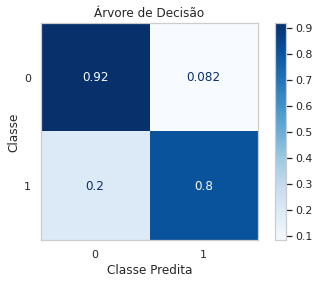

In [ ]:
# classifier_decision_tree_balanc = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
classifier_decision_tree_balanc_hp = DecisionTreeClassifier(max_depth=110, max_features='auto', random_state=42)
classifier_decision_tree_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_decision_tree_balanc, 'Árvore de Decisão - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(classifier_decision_tree_balanc_hp, 'Árvore de Decisão - Tunning HP', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(classifier_decision_tree_balanc_hp, 'Árvore de Decisão', X_test_oversamp, y_test_oversamp, 'true')

## Random Forest

In [ ]:
rf_random = RandomizedSearchCV(estimator = classifier_random_forest_balanc,
              param_distributions = rf_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train_oversamp, y_train_oversamp)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=42)

In [ ]:
print ('Parâmetros iniciais: ', classifier_random_forest_balanc.get_params(), '\n')
print ('Best Parameters: ', rf_random.best_params_, ' \n')
print ('Best Estimator: ', rf_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 

Best Parameters:  {'n_estimators': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}  

Best Estimator:  RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=12,
                       random_state=42)  



### Treino e score com novos best params

Acurácia do Random Forest - Params Iniciais: 88.66%
Acurácia do Random Forest - Tunning HP: 88.36%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8952
           1       0.92      0.84      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.89      0.88      0.88     17905
weighted avg       0.89      0.88      0.88     17905



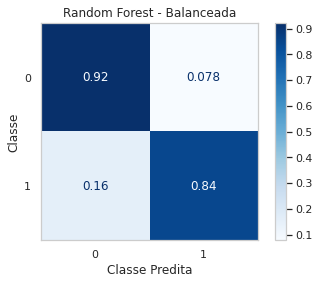

In [ ]:
# classifier_random_forest_balanc = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_random_forest_balanc_hp = RandomForestClassifier(bootstrap=False, max_depth=30,
                                                            n_estimators=12, random_state=42)
classifier_random_forest_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_random_forest_balanc, 'Random Forest - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(classifier_random_forest_balanc_hp, 'Random Forest - Tunning HP', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(classifier_random_forest_balanc_hp, 'Random Forest', X_test_oversamp, y_test_oversamp, 'true')

### Matriz de Confusão FINAL

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8952
           1       0.92      0.84      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.89      0.88      0.88     17905
weighted avg       0.89      0.88      0.88     17905



<Figure size 720x576 with 0 Axes>

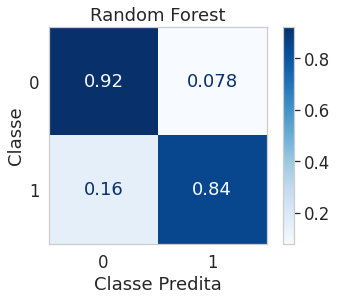

In [ ]:
plt.figure(figsize=(10,8))

conf_matrix_report2(classifier_random_forest_balanc_hp, 'Random Forest', X_test_oversamp, y_test_oversamp, 'true')

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8952
           1       0.92      0.84      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.89      0.88      0.88     17905
weighted avg       0.89      0.88      0.88     17905



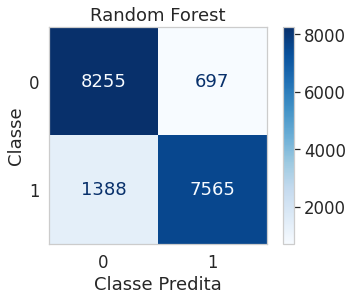

In [ ]:
conf_matrix_report2(classifier_random_forest_balanc_hp, 'Random Forest', X_test_oversamp, y_test_oversamp)

### Treino e score com best params + n_estimators = 200 - Muitas árvores

In [ ]:
classifier_random_forest_balanc_hp_200n = RandomForestClassifier(bootstrap=False, max_depth=30,
                                                            n_estimators=12, random_state=42)
classifier_random_forest_balanc_hp_200n.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_random_forest_balanc, 'Random Forest - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(classifier_random_forest_balanc_hp, 'Random Forest - Tunning HP', X_test_oversamp, y_test_oversamp)
acuracy(classifier_random_forest_balanc_hp_200n, 'Random Forest - Tunning HP - 200 trees', X_test_oversamp, y_test_oversamp)

Acurácia do Random Forest - Params Iniciais: 88.66%
Acurácia do Random Forest - Tunning HP: 88.36%
Acurácia do Random Forest - Tunning HP - 200 trees: 88.36%


### Feature Importance

In [ ]:
importances = pd.Series(data=classifier_random_forest_balanc_hp.feature_importances_, index=new_attributes.columns)

In [ ]:
importances.sort_values(ascending=False).head(10)

turno_consulta_Tarde                    0.048350
intensidade_calor_frio                  0.042635
genero_M                                0.041472
intensidade_chuva_sem_chuva_pancadas    0.034756
dia_semana_quarta                       0.034387
intensidade_calor_calor                 0.033950
dia_semana_segunda                      0.033396
dia_semana_sexta                        0.033121
especialidade_psico                     0.031067
especialidade_fisio                     0.029468
dtype: float64

Text(0.5, 1.0, 'Feature Importances - Random Forest')

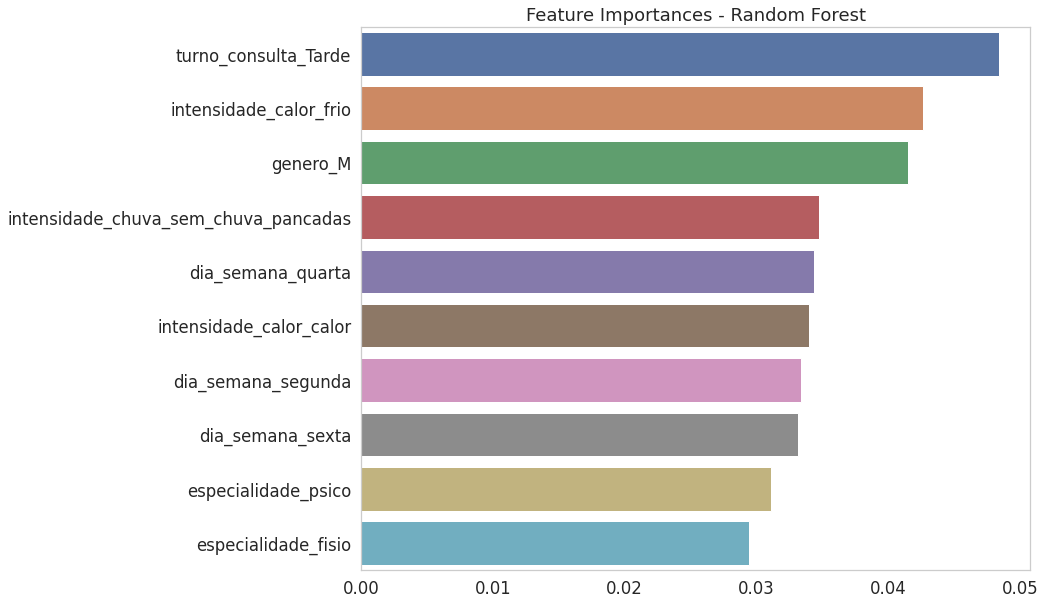

In [ ]:
plt.figure(figsize=(12,10))

importances = pd.Series(data=classifier_random_forest_balanc_hp.feature_importances_, index=new_attributes.columns)
importances = importances.sort_values(ascending=False).head(10)
sns.barplot(x=importances, y=importances.index).set_title('Feature Importances - Random Forest')

#### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

result_rf = permutation_importance(
    classifier_random_forest_balanc_hp, X_test_oversamp, y_test_oversamp, n_repeats=10, random_state=42, n_jobs=2
)

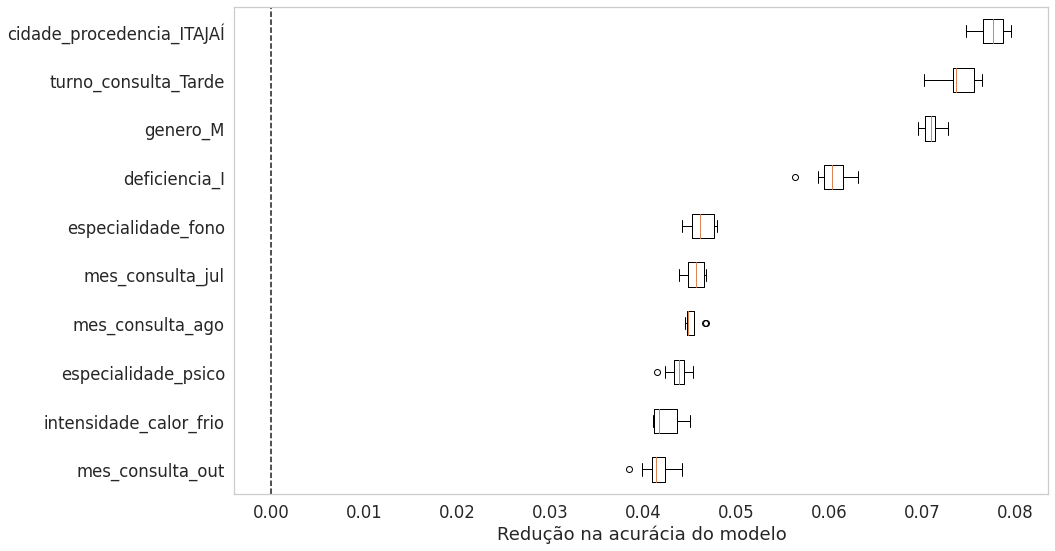

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

# Top 10 features
sorted_importances_idx = result_rf.importances_mean.argsort()[-10:]

ax.boxplot(result_rf.importances[sorted_importances_idx].T,
           vert=False, labels=new_attributes.columns[sorted_importances_idx])

# ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel('Redução na acurácia do modelo')
fig.tight_layout()

## Logistic Regression

Não convergiu com max_iter = 100 e parâmetro de penalty = None

Abstrair o fato de não ter convergido e usar a nova métrica com os novos parâmetros - falar dos nuances das combinações que algumas não foram possíveis devido a peculiaridade do algoritmo.

In [ ]:
lr_random = RandomizedSearchCV(estimator = classifier_logit_balanc,
              param_distributions = lr_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
lr_random.fit(X_train_oversamp, y_train_oversamp)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
65 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_l

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3b4f831670>,
                                        'multi_class': ['auto', 'ovr'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42)

In [ ]:
print ('Parâmetros iniciais: ', classifier_logit_balanc.get_params(), '\n')
print ('Best Parameters: ', lr_random.best_params_, ' \n')
print ('Best Estimator: ', lr_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Best Parameters:  {'C': 61.248068059259786, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}  

Best Estimator:  LogisticRegression(C=61.248068059259786, multi_class='ovr', random_state=42)  



### Treino e score com novos best params

In [ ]:
# classifier_logit_balanc = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42)
classifier_logit_balanc_hp = LogisticRegression(C=6.7977373780145545, random_state=42, solver='newton-cg')
classifier_logit_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_logit_balanc, 'Regressão Logística - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(classifier_logit_balanc_hp, 'Regressão Logística - Tunning HP', X_test_oversamp, y_test_oversamp)

Acurácia do Regressão Logística - Params Iniciais: 75.54%
Acurácia do Regressão Logística - Tunning HP: 75.52%


              precision    recall  f1-score   support

           0       0.76      0.75      0.75      8952
           1       0.75      0.76      0.76      8953

    accuracy                           0.76     17905
   macro avg       0.76      0.76      0.76     17905
weighted avg       0.76      0.76      0.76     17905



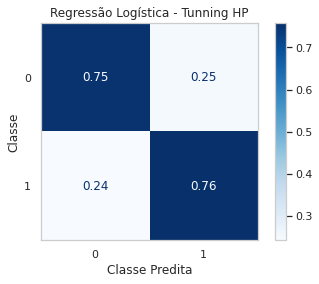

In [ ]:
conf_matrix_report2(classifier_logit_balanc_hp, 'Regressão Logística - Tunning HP', X_test_oversamp, y_test_oversamp, 'true')

## AdaBoost

In [ ]:
ada_random = RandomizedSearchCV(estimator = adaboost_classifier_balanc,
              param_distributions = ada_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
ada_random.fit(X_train_oversamp, y_train_oversamp)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(learning_rate=1,
                                                random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [10, 11, 12, 20, 50,
                                                         100]},
                   random_state=42)

In [ ]:
print ('Parâmetros iniciais: ', adaboost_classifier_balanc.get_params(), '\n')
print ('Best Parameters: ', ada_random.best_params_, ' \n')
print ('Best Estimator: ', ada_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 50, 'random_state': 42} 

Best Parameters:  {'n_estimators': 100, 'learning_rate': 0.97, 'algorithm': 'SAMME.R'}  

Best Estimator:  AdaBoostClassifier(learning_rate=0.97, n_estimators=100, random_state=42)  



### Treino e score com novos best params

Acurácia do AdaBoost (DT) - Params Iniciais: 71.33%
Acurácia do AdaBoost (DT) - Tunning HP: 74.63%
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      8952
           1       0.75      0.75      0.75      8953

    accuracy                           0.75     17905
   macro avg       0.75      0.75      0.75     17905
weighted avg       0.75      0.75      0.75     17905



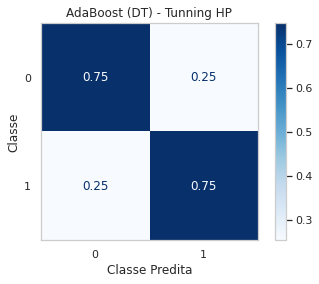

In [ ]:
# adaboost_classifier_balanc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adaboost_classifier_balanc_hp = AdaBoostClassifier(n_estimators=100, learning_rate= 1.01, random_state=42)
adaboost_classifier_balanc_hp = adaboost_classifier_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(adaboost_classifier_balanc, 'AdaBoost (DT) - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(adaboost_classifier_balanc_hp, 'AdaBoost (DT) - Tunning HP', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(adaboost_classifier_balanc_hp, 'AdaBoost (DT) - Tunning HP', X_test_oversamp, y_test_oversamp, 'true')

### Treino e score com best params + n_estimators = 200

In [ ]:
# adaboost_classifier_balanc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
# adaboost_classifier_balanc_hp = AdaBoostClassifier(n_estimators=20, random_state=42)
adaboost_classifier_balanc_hp = AdaBoostClassifier(n_estimators=200, random_state=42)
adaboost_classifier_balanc_hp = adaboost_classifier_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(adaboost_classifier_balanc, 'AdaBoost (DT) - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(adaboost_classifier_balanc_hp, 'AdaBoost (DT) - Tunning HP', X_test_oversamp, y_test_oversamp)

Acurácia do AdaBoost (DT) - Params Iniciais: 71.33%
Acurácia do AdaBoost (DT) - Tunning HP: 74.97%


### Treino e score com Árvore de Decisão com hiperparâmetros ajustados

Acurácia do AdaBoost (DT) - Params Iniciais: 71.33%
Acurácia do AdaBoost (DT) - Tunning HP: 74.97%
Acurácia do AdaBoost (DT) - Tunning HP Decision Tree: 87.97%
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      8952
           1       0.91      0.85      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.88      0.88      0.88     17905
weighted avg       0.88      0.88      0.88     17905



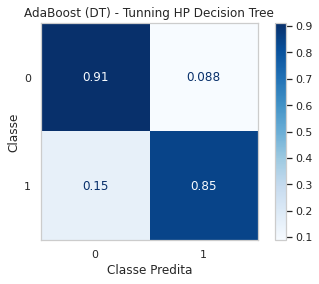

In [ ]:
adaboost_classifier_balanc_hp_dt = AdaBoostClassifier(base_estimator = classifier_decision_tree_balanc_hp, n_estimators=200, random_state=42)
adaboost_classifier_balanc_hp_dt = adaboost_classifier_balanc_hp_dt.fit(X_train_oversamp, y_train_oversamp)

acuracy(adaboost_classifier_balanc, 'AdaBoost (DT) - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(adaboost_classifier_balanc_hp, 'AdaBoost (DT) - Tunning HP', X_test_oversamp, y_test_oversamp)
acuracy(adaboost_classifier_balanc_hp_dt, 'AdaBoost (DT) - Tunning HP Decision Tree', X_test_oversamp, y_test_oversamp)

conf_matrix_report2(adaboost_classifier_balanc_hp_dt, 'AdaBoost (DT) - Tunning HP Decision Tree', X_test_oversamp, y_test_oversamp, 'true')

### Treino e score com Random Forest com hiperparâmetros ajustados (comparado a Árvore de Decisão)

Acurácia do AdaBoost (DT) - Tunning HP Decision Tree: 87.97%
Acurácia do AdaBoost (DT) - Tunning HP Random Forest: 88.94%
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8952
           1       0.91      0.86      0.89      8953

    accuracy                           0.89     17905
   macro avg       0.89      0.89      0.89     17905
weighted avg       0.89      0.89      0.89     17905



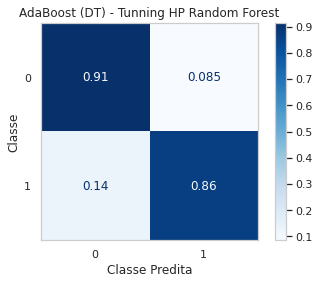

In [ ]:
adaboost_classifier_balanc_hp_rf = AdaBoostClassifier(base_estimator = classifier_random_forest_balanc_hp, n_estimators=200, random_state=42)
adaboost_classifier_balanc_hp_rf = adaboost_classifier_balanc_hp_rf.fit(X_train_oversamp, y_train_oversamp)

acuracy(adaboost_classifier_balanc_hp_dt, 'AdaBoost (DT) - Tunning HP Decision Tree', X_test_oversamp, y_test_oversamp)
acuracy(adaboost_classifier_balanc_hp_rf, 'AdaBoost (DT) - Tunning HP Random Forest', X_test_oversamp, y_test_oversamp)

conf_matrix_report2(adaboost_classifier_balanc_hp_rf, 'AdaBoost (DT) - Tunning HP Random Forest', X_test_oversamp, y_test_oversamp, 'true')

In [ ]:
adaboost_classifier_balanc_hp_dt.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 110,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 42,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=110, max_features='auto', random_state=42),
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 42}

### Feature Importance

In [ ]:
importances = pd.Series(data=adaboost_classifier_balanc_hp_dt.feature_importances_, index=new_attributes.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:631: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


In [ ]:
importances.sort_values(ascending=False)

necessita_acompanhante                  0.045015
menor12anos                             0.037506
turno_consulta_Tarde                    0.037486
dia_semana_quarta                       0.032803
especialidade_fono                      0.032197
dia_semana_terça                        0.031442
intensidade_chuva_moderada              0.031304
intensidade_calor_frio                  0.028260
mes_consulta_jun                        0.027348
intensidade_calor_calor                 0.026396
dia_semana_sexta                        0.026295
dia_semana_segunda                      0.022094
intensidade_chuva_fraca                 0.020679
mes_consulta_fev                        0.017317
deficiencia_F                           0.016874
maior60anos                             0.016452
deficiencia_I                           0.015812
especialidade_terap_ocupacional         0.015186
cidade_procedencia_PENHA                0.014597
cidade_procedencia_CAMBORIU             0.013719
mes_consulta_out    

Text(0.5, 1.0, 'Feature Importance - AdaBoost')

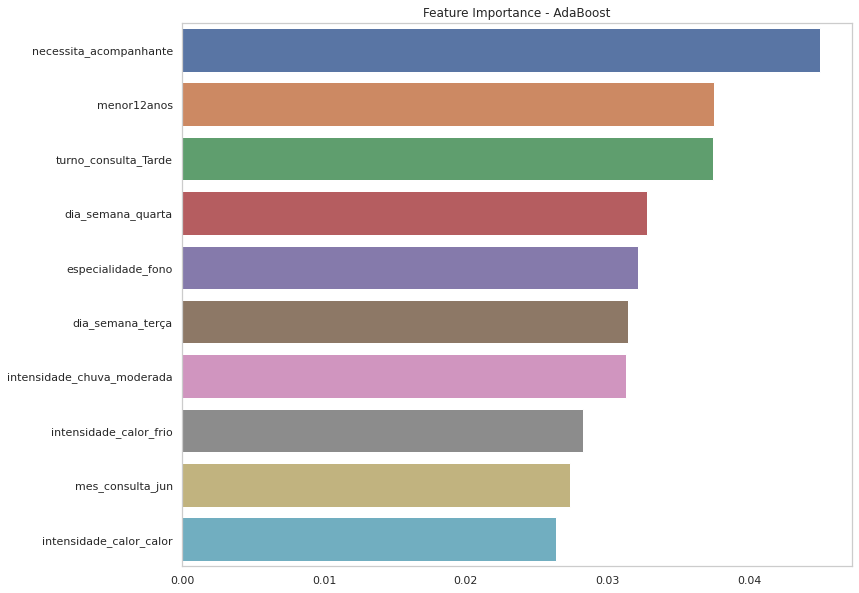

In [ ]:
plt.figure(figsize=(12,10))

importances = pd.Series(data=adaboost_classifier_balanc_hp_dt.feature_importances_, index=new_attributes.columns)
importances = importances.sort_values(ascending=False).head(10)
sns.barplot(x=importances, y=importances.index).set_title('Feature Importance - AdaBoost')

#### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    adaboost_classifier_balanc_hp_dt, X_test_oversamp, y_test_oversamp, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=new_attributes.columns)

In [ ]:
forest_importances.sort_values(ascending=False)

turno_consulta_Tarde                    0.086808
deficiencia_I                           0.082457
cidade_procedencia_ITAJAÍ               0.076509
genero_M                                0.072589
deficiencia_F                           0.066534
menor12anos                             0.061810
intensidade_calor_frio                  0.060586
especialidade_fono                      0.060223
especialidade_psico                     0.055750
intensidade_chuva_sem_chuva_pancadas    0.052332
intensidade_calor_calor                 0.051902
necessita_acompanhante                  0.051818
mes_consulta_ago                        0.046311
dia_semana_terça                        0.046250
especialidade_fisio                     0.043669
especialidade_especialista              0.042608
dia_semana_segunda                      0.042508
dia_semana_quarta                       0.042424
intensidade_chuva_moderada              0.040441
dia_semana_sexta                        0.040274
mes_consulta_jul    

Text(0.5, 1.0, 'Feature Importance - AdaBoost')

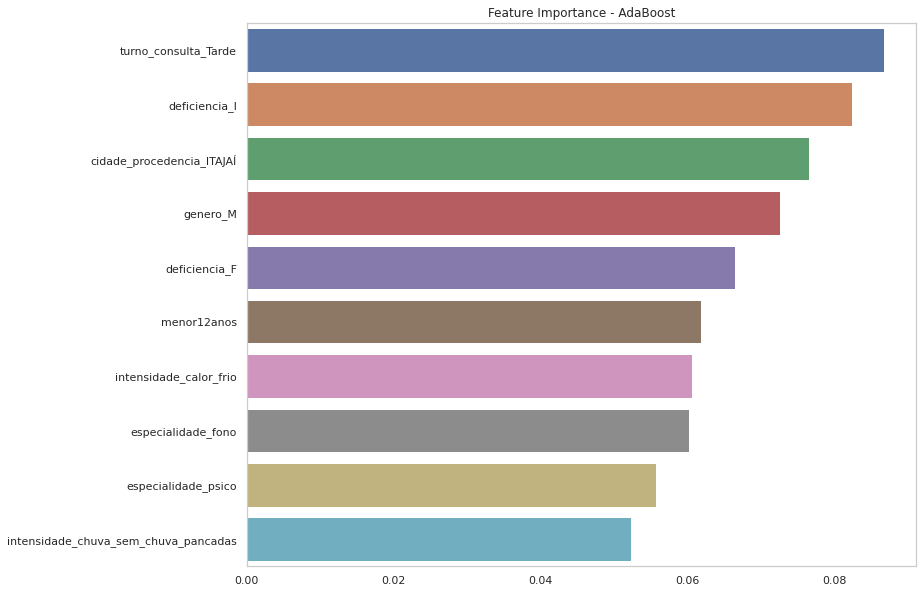

In [ ]:
plt.figure(figsize=(12,10))

adaboost_importances = forest_importances.sort_values(ascending=False).head(10)
sns.barplot(x=adaboost_importances, y=adaboost_importances.index).set_title('Feature Importance - AdaBoost')

<Figure size 864x720 with 0 Axes>

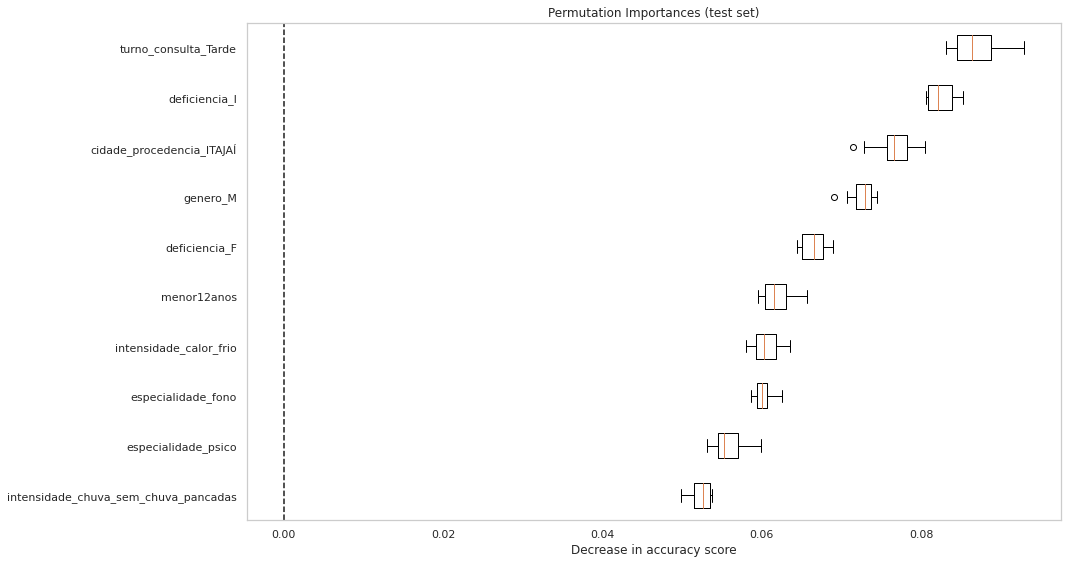

In [ ]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1)
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(figsize=(15, 8))

# Top 10 features
sorted_importances_idx = result.importances_mean.argsort()[-10:]

ax.boxplot(result.importances[sorted_importances_idx].T,
           vert=False, labels=new_attributes.columns[sorted_importances_idx])

ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
fig.tight_layout()

## Gradient Boosting

In [ ]:
gboost_random = RandomizedSearchCV(estimator = gboosting_classifier_balanc,
              param_distributions = gboost_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
gboost_random.fit(X_train_oversamp, y_train_oversamp)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=10,
                                                                                    random_state=42),
                                                        random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.5, 1.0],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 

In [ ]:
print ('Parâmetros iniciais: ', gboosting_classifier_balanc.get_params(), '\n')
print ('Best Parameters: ', gboost_random.best_params_, ' \n')
print ('Best Estimator: ', gboost_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init__ccp_alpha': 0.0, 'init__class_weight': None, 'init__criterion': 'gini', 'init__max_depth': 10, 'init__max_features': None, 'init__max_leaf_nodes': None, 'init__min_impurity_decrease': 0.0, 'init__min_samples_leaf': 1, 'init__min_samples_split': 2, 'init__min_weight_fraction_leaf': 0.0, 'init__random_state': 42, 'init__splitter': 'best', 'init': DecisionTreeClassifier(max_depth=10, random_state=42), 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Best Parameters:  {'n_estimators': 17, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 50, 'learning_rate': 1.0}  

Best Estimato

### Treino e score com novos best params

Acurácia do Gradient Boosting - Params Iniciais: 73.24%
Acurácia do Gradient Boosting - Tunning HP: 88.49%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8952
           1       0.91      0.85      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.89      0.88      0.88     17905
weighted avg       0.89      0.88      0.88     17905



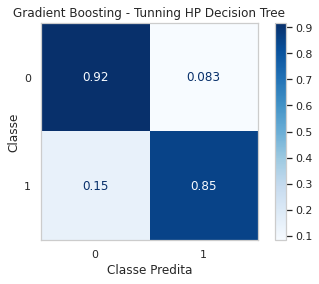

In [ ]:
gboosting_classifier_balanc_hp = GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=10, random_state=42),
                                                            learning_rate=1.0, max_depth=50, min_samples_leaf=3,
                                                            min_samples_split=10, n_estimators=17,
                                                            random_state=42)
gboosting_classifier_balanc_hp = gboosting_classifier_balanc_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(gboosting_classifier_balanc, 'Gradient Boosting - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(gboosting_classifier_balanc_hp, 'Gradient Boosting - Tunning HP', X_test_oversamp, y_test_oversamp)

conf_matrix_report2(gboosting_classifier_balanc_hp, 'Gradient Boosting - Tunning HP Decision Tree', X_test_oversamp, y_test_oversamp, 'true')

### Treino e score com estimador (init) Decision tree com hiperparâmetros ajustados

In [ ]:
gboosting_classifier_balanc_hp_dt = GradientBoostingClassifier(init=classifier_decision_tree_balanc_hp,
                                                            learning_rate=0.05, max_depth=30,
                                                            min_samples_split=6, n_estimators=19,
                                                            random_state=42)
gboosting_classifier_balanc_hp_dt = gboosting_classifier_balanc_hp_dt.fit(X_train_oversamp, y_train_oversamp)

acuracy(gboosting_classifier_balanc, 'Gradient Boosting - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(gboosting_classifier_balanc_hp, 'Gradient Boosting - Tunning HP', X_test_oversamp, y_test_oversamp)
acuracy(gboosting_classifier_balanc_hp_dt, 'Gradient Boosting - Tunning HP DT', X_test_oversamp, y_test_oversamp)

Acurácia do Gradient Boosting - Params Iniciais: 73.24%
Acurácia do Gradient Boosting - Tunning HP: 88.49%
Acurácia do Gradient Boosting - Tunning HP DT: 86.56%


### Matriz de Confusão FINAL

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8952
           1       0.91      0.85      0.88      8953

    accuracy                           0.88     17905
   macro avg       0.89      0.88      0.88     17905
weighted avg       0.89      0.88      0.88     17905



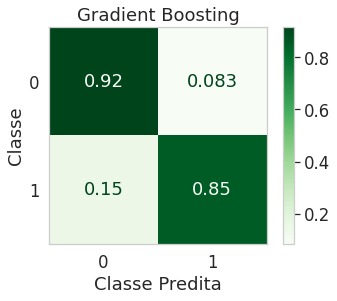

In [ ]:
conf_matrix_report2(gboosting_classifier_balanc_hp, 'Gradient Boosting', X_test_oversamp, y_test_oversamp, 'true', 'Greens')

## XGBoost

Não usa como base o SKLearn, foi alterado apenas um parâmetro:

objective='binary:**logistic**' -> objective='binary:**logitraw**'

### Treino e score com novos best params

Acurácia do XGBoost - Params Iniciais: 72.56%
Acurácia do XGBoost - Tunning HP: 61.30%
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      8952
           1       0.60      0.70      0.64      8953

    accuracy                           0.61     17905
   macro avg       0.62      0.61      0.61     17905
weighted avg       0.62      0.61      0.61     17905



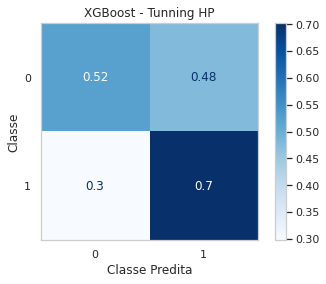

In [ ]:
xgb_classifier_hp = XGBClassifier(objective='binary:hinge', random_state=42)
xgb_classifier_hp = xgb_classifier_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(xgb_classifier, 'XGBoost - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(xgb_classifier_hp, 'XGBoost - Tunning HP', X_test_oversamp, y_test_oversamp)

conf_matrix_report2(xgb_classifier_hp, 'XGBoost - Tunning HP', X_test_oversamp, y_test_oversamp, 'true')

## LightGBM

In [ ]:
lightgbm_random = RandomizedSearchCV(estimator = light_gbm_classifier,
              param_distributions = lightgbm_grid,
              n_iter = 20,
              cv = 5, verbose=0,
              random_state=42, n_jobs = -1)

In [ ]:
lightgbm_random.fit(X_train_oversamp, y_train_oversamp)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 734, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 538, in fit
    self._Booster = train(params, train_set,
  File "/usr/local/lib/pytho

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(objective='binary',
                                            random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'boosting_type': ['rf', 'gbdt', 'dart'],
                                        'class_weight': ['balanced', None],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.5, 1.0]},
                   random_state=42)

In [ ]:
print ('Parâmetros iniciais: ', light_gbm_classifier.get_params(), '\n')
print ('Best Parameters: ', lightgbm_random.best_params_, ' \n')
print ('Best Estimator: ', lightgbm_random.best_estimator_, ' \n')

Parâmetros iniciais:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 

Best Parameters:  {'learning_rate': 1.0, 'class_weight': 'balanced', 'boosting_type': 'gbdt'}  

Best Estimator:  LGBMClassifier(class_weight='balanced', learning_rate=1.0, objective='binary',
               random_state=42)  



### Treino e score com novos best params

Acurácia do Light GBM - Params Iniciais: 80.03%
Acurácia do Light GBM - Tunning HP: 85.41%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8952
           1       0.87      0.83      0.85      8953

    accuracy                           0.85     17905
   macro avg       0.85      0.85      0.85     17905
weighted avg       0.85      0.85      0.85     17905



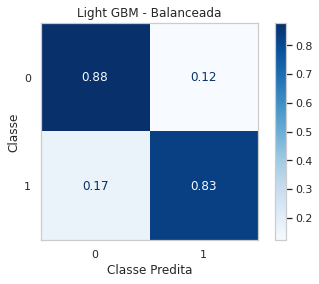

In [ ]:
from lightgbm import LGBMClassifier

light_gbm_classifier_hp = LGBMClassifier(class_weight='balanced', learning_rate=1.0,
                                         objective='binary', random_state=42)
light_gbm_classifier_hp = light_gbm_classifier_hp.fit(X_train_oversamp, y_train_oversamp)

acuracy(light_gbm_classifier, 'Light GBM - Params Iniciais', X_test_oversamp, y_test_oversamp)
acuracy(light_gbm_classifier_hp, 'Light GBM - Tunning HP', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(light_gbm_classifier_hp, 'Light GBM - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

## Stacking

### Treino com Random Forest Ajustado (Hiperparâmetros)

Acurácia do Stacking - Ajustado: 88.61%
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8952
           1       0.90      0.87      0.88      8953

    accuracy                           0.89     17905
   macro avg       0.89      0.89      0.89     17905
weighted avg       0.89      0.89      0.89     17905



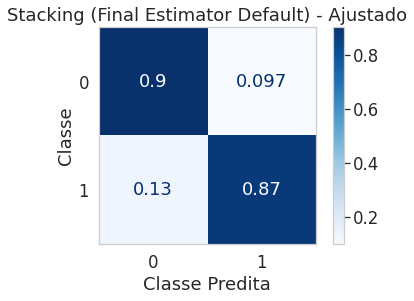

In [ ]:
estimators = [
     ('rf', classifier_random_forest_balanc_hp),
     ('xgb', xgb_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators, cv=5) # final_estimator default = LogisticRegression
stacking_classifier = stacking_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(stacking_classifier, 'Stacking - Ajustado', X_test_oversamp, y_test_oversamp)
# cross_validation(stacking_classifier, X_smote_res, y_smote_res)
conf_matrix_report2(stacking_classifier, 'Stacking (Final Estimator Default) - Ajustado', X_test_oversamp, y_test_oversamp, 'true')

### Matriz de Confusão FINAL

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8952
           1       0.90      0.87      0.88      8953

    accuracy                           0.89     17905
   macro avg       0.89      0.89      0.89     17905
weighted avg       0.89      0.89      0.89     17905



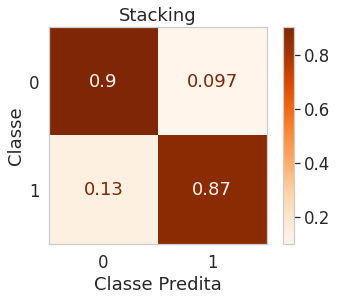

In [ ]:
conf_matrix_report2(stacking_classifier, 'Stacking', X_test_oversamp, y_test_oversamp, 'true', 'Oranges')

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8952
           1       0.90      0.87      0.88      8953

    accuracy                           0.89     17905
   macro avg       0.89      0.89      0.89     17905
weighted avg       0.89      0.89      0.89     17905



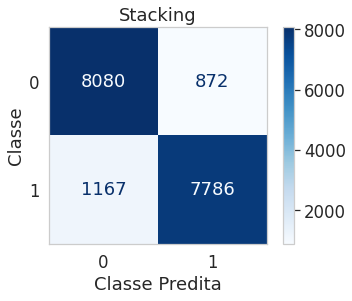

In [ ]:
conf_matrix_report2(stacking_classifier, 'Stacking', X_test_oversamp, y_test_oversamp)

### Treino com Random Forest e Gradient Boosting Ajustados (Hiperparâmetros)

Acurácia do Stacking - Balanceada: 82.52%
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      8952
           1       0.83      0.82      0.82      8953

    accuracy                           0.83     17905
   macro avg       0.83      0.83      0.83     17905
weighted avg       0.83      0.83      0.83     17905



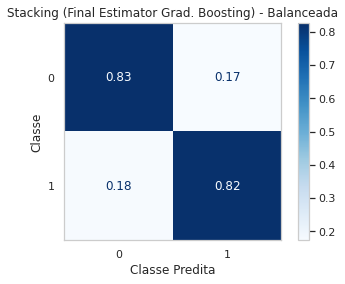

In [ ]:
estimators = [
     ('rf', classifier_random_forest_balanc),
     ('xgb', xgb_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators,
                            final_estimator=gboosting_classifier_balanc_hp,
                            cv=5)
stacking_classifier = stacking_classifier.fit(X_train_oversamp, y_train_oversamp)

acuracy(stacking_classifier, 'Stacking - Balanceada', X_test_oversamp, y_test_oversamp)
# cross_validation(stacking_classifier, X_smote_res, y_smote_res)
conf_matrix_report2(stacking_classifier, 'Stacking (Final Estimator Grad. Boosting) - Balanceada', X_test_oversamp, y_test_oversamp, 'true')

# Curvas ROC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

estimators = [
     ('rf', classifier_random_forest_balanc_hp),
     ('xgb', xgb_classifier)
]

classifiers = [RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=12, random_state=42),
               DecisionTreeClassifier(max_depth=110, max_features='auto', random_state=42),
               AdaBoostClassifier(base_estimator = classifier_decision_tree_balanc_hp, n_estimators=200, random_state=42),
               GradientBoostingClassifier(init=DecisionTreeClassifier(max_depth=10, random_state=42),
                                                            learning_rate=1.0, max_depth=50, min_samples_leaf=3,
                                                            min_samples_split=10, n_estimators=17,
                                                            random_state=42),
               XGBClassifier(objective="binary:logistic", random_state=42),
               LGBMClassifier(class_weight='balanced', learning_rate=1.0,
                                         objective='binary', random_state=42),
               StackingClassifier(estimators=estimators, cv=5) # final_estimator default = LogisticRegression
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_oversamp, y_train_oversamp)
    yproba = model.predict_proba(X_test_oversamp)[::,1]

    fpr, tpr, _ = roc_curve(y_test_oversamp,  yproba)
    auc = roc_auc_score(y_test_oversamp, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

RandomForestClassifier, AUC=0.937
DecisionTreeClassifier, AUC=0.897
AdaBoostClassifier, AUC=0.927
GradientBoostingClassifier, AUC=0.938
XGBClassifier, AUC=0.794
LGBMClassifier, AUC=0.924
StackingClassifier, AUC=0.941


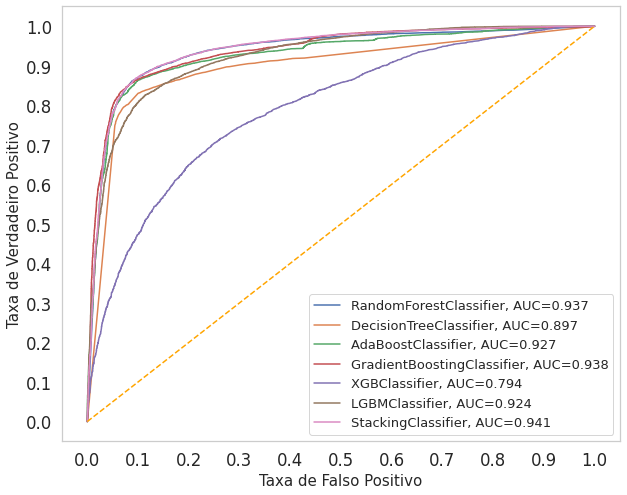

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

for i in result_table.index:
    print("{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Taxa de Falso Positivo", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Taxa de Verdadeiro Positivo", fontsize=15)

plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Modelo com atributos mais importantes

In [ ]:
atributos_importantes = ['turno_consulta_Tarde',
                         'intensidade_calor_frio',
                         'genero_M',
                         'intensidade_chuva_sem_chuva_pancadas',
                         'dia_semana_quarta',
                         'intensidade_calor_calor',
                         'dia_semana_segunda',
                         'dia_semana_sexta',
                         'especialidade_psico',
                         'especialidade_fisio']

In [ ]:
new_attributes_apenas_importantes = new_attributes[atributos_importantes]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_attributes_apenas_importantes, classes, test_size = 0.20, stratify = classes)
print("Dados de treino com %d elementos e dados de teste com %d elementos" % (len(X_train), len(X_test)))

Dados de treino com 39674 elementos e dados de teste com 9919 elementos


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state = 32)
X_smote_res, y_smote_res = smote.fit_resample(new_attributes_apenas_importantes, classes)

X_train_oversamp, X_test_oversamp, y_train_oversamp, y_test_oversamp = train_test_split(X_smote_res, y_smote_res, test_size = 0.20, stratify = y_smote_res)
print("Dados de treino com %d elementos e dados de teste com %d elementos" % (len(X_train_oversamp), len(X_test_oversamp)))

Dados de treino com 71617 elementos e dados de teste com 17905 elementos


Acurácia do Random Forest - Feature Importance: 56.79%
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      8952
           1       0.56      0.60      0.58      8953

    accuracy                           0.57     17905
   macro avg       0.57      0.57      0.57     17905
weighted avg       0.57      0.57      0.57     17905



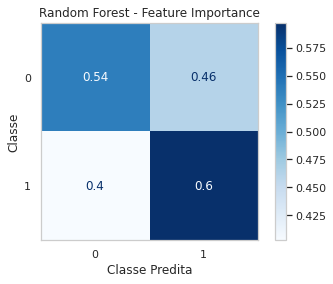

In [ ]:
classifier_random_forest_feature_importance = RandomForestClassifier(bootstrap=False, max_depth=30,
                                                            n_estimators=12, random_state=42)
classifier_random_forest_feature_importance.fit(X_train_oversamp, y_train_oversamp)

acuracy(classifier_random_forest_feature_importance, 'Random Forest - Feature Importance', X_test_oversamp, y_test_oversamp)
conf_matrix_report2(classifier_random_forest_feature_importance, 'Random Forest - Feature Importance', X_test_oversamp, y_test_oversamp, 'true')